# Machine Learning: Workflows & Pipelines
### For Data, Analytics & AI

### Workflow

### Pipelines

<img src="seng-pipeline.png" />

## Exercise: Machine Learning Software Project

* Goal:
    * to create a reporducible software engineering project with a predictive deployment 
    * using the `pipeline` project as an example
    
* The project should include (vesionable) code for:
    * data injestion
    * data preparation
    * modelling
    * evaluaiton
    * retraining and weight sharing
    * model deployment (ie., weight import & prediction)

* EXTRA:
    * consider creating a user interface for prediction
        * eg., use `input()` to obtain features, or an HTML form 

## Examples

In [6]:
import numpy as np

In [7]:
class_names = [
    'light',
    'arabian light',
    'heavy',
    'superlight'
]

y = [0] * 10 + [1] * 10 + [2] * 10 + [3] * 10

y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [10]:
x1_light = np.random.normal(5, 3, 10) # dense
x2_light = np.random.normal(65, 3, 10) # boil

x1_alight = np.random.normal(10, 3, 10) # dense
x2_alight = np.random.normal(60, 3, 10) # boil

x1_heavy = np.random.normal(15, 3, 10) # dense
x2_heavy = np.random.normal(80, 3, 10) # boil

x1_slight = np.random.normal(2, 3, 10) # dense
x2_slight = np.random.normal(50, 3, 10) # boil

X = np.r_[
    np.c_[x1_light, x2_light],
    np.c_[x1_alight, x2_alight],
    np.c_[x1_heavy, x2_heavy],
    np.c_[x1_slight, x2_slight],
]

In [13]:
sns.scatterplot?

Signature:
sns.scatterplot(
    x=None,
    y=None,
    hue=None,
    style=None,
    size=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    x_bins=None,
    y_bins=None,
    units=None,
    estimator=None,
    ci=95,
    n_boot=1000,
    alpha='auto',
    x_jitter=None,
    y_jitter=None,
    legend='brief',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and

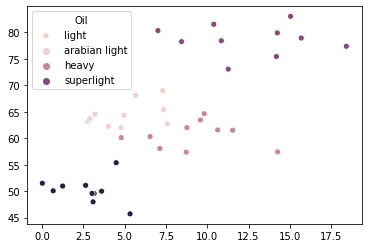

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(X[:, 0], X[:, 1], hue=y);

plt.legend(title='Oil', loc='upper left', labels=class_names)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', multi_class='auto').fit(X, y)

In [44]:
byt = pickle.dumps(y)

In [46]:
pickle.loads(byt)[:5]

[0, 0, 0, 0, 0]

In [48]:
import pickle
pickle.dump(model, open('oil_model.pkl', 'wb'))

In [52]:
loaded = pickle.load(open('oil_model.pkl', 'rb'))
loaded.predict([[0, 0]])

array([3])

In [28]:
index = model.predict([
    [-3, 50],
])[0]

In [29]:
class_names[index]

'superlight'

In [33]:
model.predict_proba([
    [-10, -10],
])

array([[0.41356266, 0.10179753, 0.00512859, 0.47951122]])

In [34]:
dense = float(input('Density? '))
boil = float(input('Boiling pt? '))

Density?  10
Boiling pt?  30


In [36]:
x_unknown = [ [dense, boil] ]

In [39]:
class_names[ model.predict(x_unknown)[0] ]

'arabian light'

## Exercise

* Starting with this example....

### Part 1
* change the characteristics of the oil... 
    * a. so they are more alike, 
    * b. and more distinct

### Part 2
* add a new features, x3_pressure = .... 
* and see how the algorithm performs
    
#### EXTRA:
* use cross_validate to score the model 

```python

import pickle

model = pickle.load(open('oil_model.pkl', 'rb'))

x_d = float(input('Dense? '))
x_b = float(input('Boil? '))

yhat = model.predict([
 [x_d, x_b]
])[0]

class_names = [
    'light',
    'arabian light',
    'heavy',
    'superlight'
]

print(class_names[yhat])

```

### Exercise

* Create an `oil.py` to receive user input and predict a type of oil
    * modify the above to extend it to include your `x3`
    
* Use Anaconda Prompt
    * Start > Anaconda Prompt
    * cd Documents/
        * or whatever folder your `oil.py` is in